<a href="https://colab.research.google.com/github/Balaji5359/Kaggle-DS-Projects/blob/main/Plant_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Predict Plant Diseases Using Environmental Factors
The dataset contains 10,000 samples representing environmental measurements from different farm locations with the following features:

* temperature: Measured in degrees Celsius
* humidity: Measured as percentage
* rainfall: Measured in millimeters
* soil_pH: Acidity/alkalinity measurement
* disease_present: Binary label (0 = healthy, 1 = diseased)


# Potential Uses
* Binary classification practice
* Feature importance analysis
* Understanding feature interactions
* Testing model robustness
* Imbalanced classification techniques

In [46]:
data = pd.read_csv('/content/plant_disease_dataset.csv')
data.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [48]:
data.isna().sum()

,0
temperature,0
humidity,0
rainfall,0
soil_pH,0
disease_present,0


In [49]:
#Data Exploration
data.describe()


,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


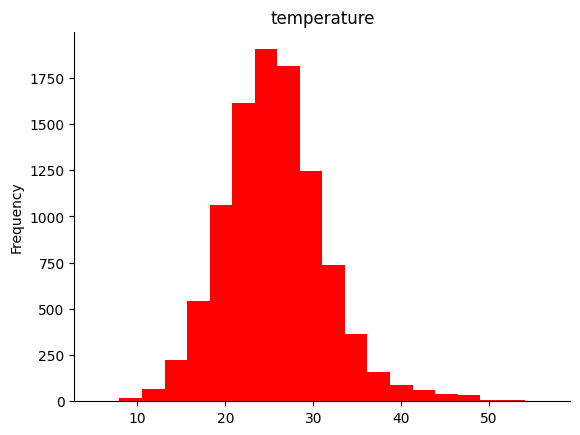

In [50]:
# Finding relationships of data columns
# @title temperature
from matplotlib import pyplot as plt
data['temperature'].plot(kind='hist', bins=20, title='temperature',color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)

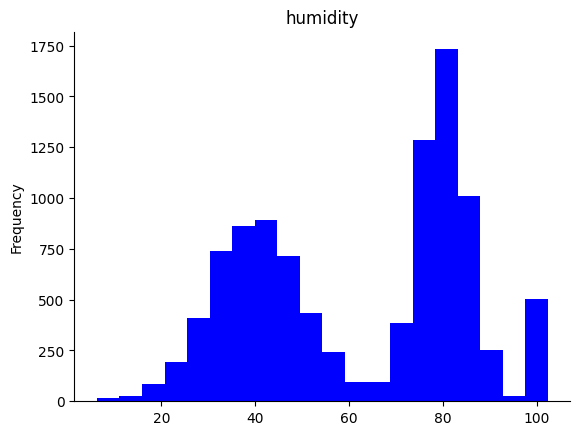

In [51]:
from matplotlib import pyplot as plt
data['humidity'].plot(kind='hist', bins=20, title='humidity',color='blue')
plt.gca().spines[['top', 'right',]].set_visible(False)

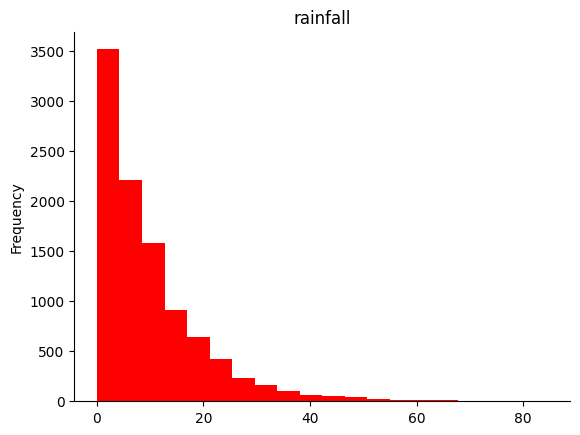

In [52]:

from matplotlib import pyplot as plt
data['rainfall'].plot(kind='hist', bins=20, title='rainfall',color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
#Data Precrocessing
X = data.drop('disease_present', axis=1)
y = data['disease_present']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 4)
y_train shape: (8000,)
X_test shape: (2000, 4)
y_test shape: (2000,)


In [54]:
# Build a classifier using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, log_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.763


In [55]:
#Classification report
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1518
           1       0.55      0.09      0.15       482

    accuracy                           0.76      2000
   macro avg       0.66      0.53      0.50      2000
weighted avg       0.72      0.76      0.69      2000



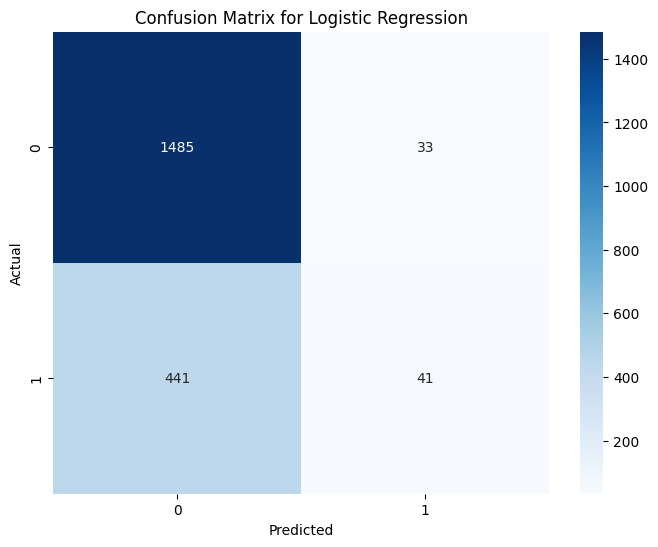

In [56]:
# Visualize classification report of data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [57]:
#Build model using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)

In [58]:
#showing classification report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1518
           1       0.54      0.51      0.52       482

    accuracy                           0.78      2000
   macro avg       0.69      0.68      0.69      2000
weighted avg       0.77      0.78      0.77      2000



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

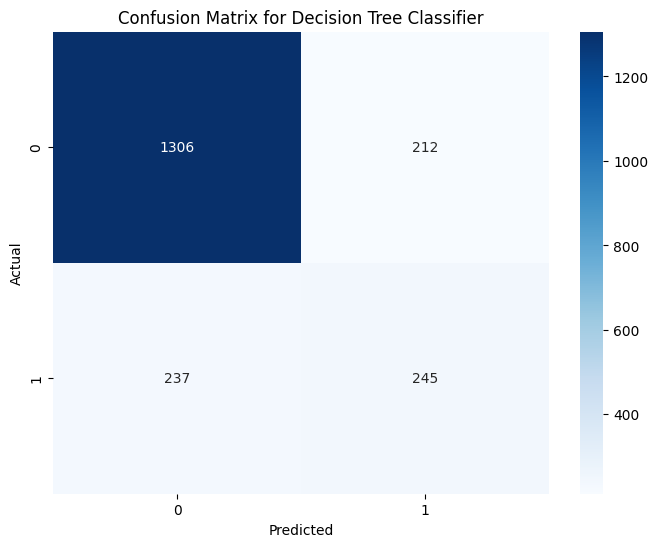

In [59]:
#Visualize the report
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')

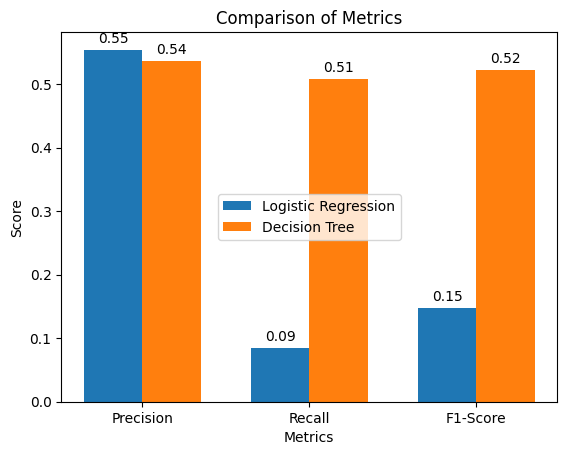

In [60]:
# Comparing both classifiers precision, recall, and f1-scores by using bargraph
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate metrics for Logistic Regression
lr_precision = precision_score(y_test, log_pred)
lr_recall = recall_score(y_test, log_pred)
lr_f1 = f1_score(y_test, log_pred)
# Calculate metrics for decision tree
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
#Plot bar graph
metrics = ['Precision', 'Recall', 'F1-Score']
lr_values = [lr_precision, lr_recall, lr_f1]
dt_values = [dt_precision, dt_recall, dt_f1]
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_values, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, dt_values, width, label='Decision Tree')
#Show values on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

In [64]:
# Take sample data and classify it
sample = data.sample(5)

# Drop the target column from the sample before scaling
sample_features = sample.drop('disease_present', axis=1)

# Scale the sample data using the same scaler fitted on the training data
sample_scaled = scaler.transform(sample_features)

# Make predictions using the trained models
log_sample_pred = log_reg.predict(sample_scaled)
dt_sample_pred = dt_classifier.predict(sample_scaled)

print("Sample prediction using logistic classifier:", log_sample_pred)
print("Sample prediction using decision tree classifier:", dt_sample_pred)

Sample prediction using logistic classifier: [0 0 0 0 0]
Sample prediction using decision tree classifier: [0 1 0 0 0]
